# Six States Protocol with eves dropper
In this protocol, when Asja send the states, Eve will measure it and then will send it to the Balvis, which will introduce errors in the key.
In this cell we will define some function and will generate the random key, asja, Eve and Balvis basis randomly.

In [1]:


# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble
from qiskit.quantum_info import Operator
from numpy import pi
from qiskit.circuit import Parameter
from qiskit.qasm3 import dumps
from qiskit_ibm_runtime import Sampler
from qiskit.compiler import transpile
from qiskit_aer import Aer
from random import randrange
from qiskit.primitives import BackendSampler
import hashlib 



def print_outcomes_in_reserve(counts): # takes a dictionary variable
    for outcome in counts: # for each key-value in dictionary
        reverse_outcome = ''
        for i in outcome: # each string can be considered as a list of characters
            reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    return reverse_outcome

#Source for SendState: awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb

def SendState(qc1, qc2, qc1_name):
    ''' This function takes the output of a circuit qc1 (made up only of x and 
        h gates, simulate noisy quantum channel, where Pauli errors (X - bit flip; Z - phase flip
        will occur in qc2 and then initializes another circuit qc2 with introduce noise.
    ''' 
    
    # Quantum state is retrieved from qasm code of qc1
    qs = dumps(qc1).split(sep=';')[4:-1]
    print(qs)

    # Process the code to get the instructions
    for index, instruction in enumerate(qs):
        qs[index] = instruction.lstrip()

    
     # Parse the instructions and apply to new circuit
    for instruction in qs:
        if instruction[0] == 'x':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.x(qreg[old_qr])
        elif instruction[0] == 'h':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.h(qreg[old_qr])
        elif instruction[0] == 's':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.s(qreg[old_qr])
       
        elif instruction[0] == 'm': # exclude measuring:
            pass
        else:
            raise Exception(f"Unable to parse instruction: {instruction}")

       





qreg = QuantumRegister(24) # quantum register with 24 qubits
creg = ClassicalRegister(24) # classical register with 24 bits

# Quantum circuit for Asja state
asja = QuantumCircuit(qreg, creg, name='Asja')

send=[] #Initial bit string to send
asja_basis=[] #Initial Asja Basis
balvis_basis=[] #Initial Balvis basis
eve_basis =[]

# Creating randomly chosen basis for Asja (X,Y,Z)
for i in range(24):
    a_b = randrange(3)
    asja_basis.append(a_b)
asja_basis = ['X' if x==1 else "Y" if x==0 else "Z" if x==2 else x for x in asja_basis]
print("Asja Basis:      ",asja_basis)


# Creating randomly chosen basis for Balvis (X,Y,Z)
for i in range(24):
    a_b = randrange(3)
    balvis_basis.append(a_b)
balvis_basis = ['X' if x==1 else "Y" if x==0 else "Z" if x==2 else x for x in balvis_basis]
print("Balvis Basis:        ",balvis_basis)

# Creating randomly chosen basis for Balvis (X,Y,Z)
for i in range(24):
    a_b = randrange(3)
    eve_basis.append(a_b)
eve_basis = ['X' if x==1 else "Y" if x==0 else "Z" if x==2 else x for x in balvis_basis]
print("Eve Basis:        ",eve_basis)


#Creating random bit string
for i in range(24):
    bit = randrange(2)
    send.append(bit)
print("The bits Asja wants to send:     ",send)

    


Asja Basis:       ['Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Y', 'Z', 'Z', 'X', 'Z', 'Y', 'Y', 'Z', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'Y']
Balvis Basis:         ['Y', 'Y', 'Y', 'Z', 'X', 'Y', 'X', 'Z', 'Z', 'Z', 'Z', 'Y', 'Y', 'X', 'Y', 'Z', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'X', 'X']
Eve Basis:         ['Y', 'Y', 'Y', 'Z', 'X', 'Y', 'X', 'Z', 'Z', 'Z', 'Z', 'Y', 'Y', 'X', 'Y', 'Z', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'X', 'X']
The bits Asja wants to send:      [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


Asja will apply the corresponding gates as her basis.

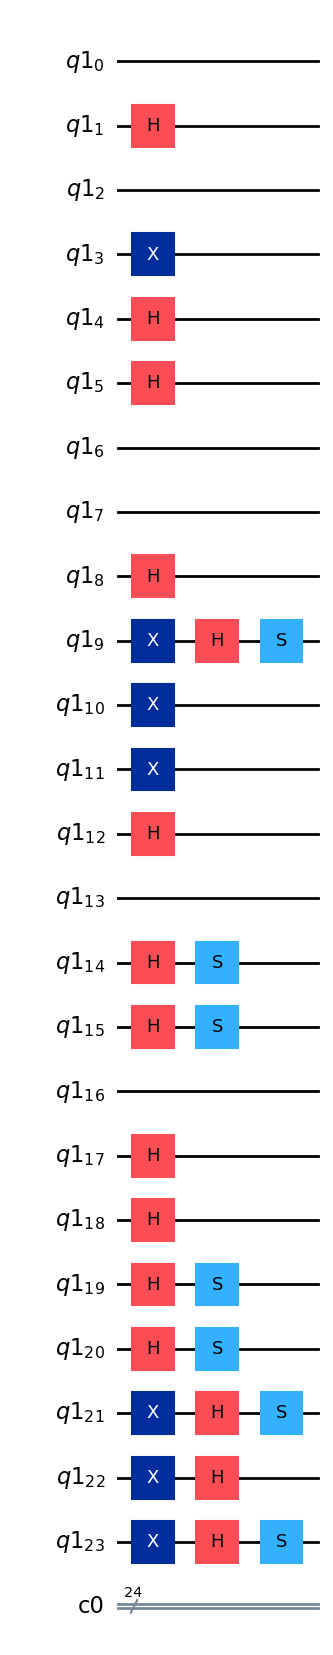

In [2]:
#Apply X gate if bit is equal to 1
for i, n in enumerate(send):
    if n==1:
        asja.x(qreg[i]) # apply x-gate
for i, k in enumerate(asja_basis): 
    if k=='X':
        asja.h(qreg[i])
    if k=="Y":
        asja.h(qreg[i])
        asja.s([qreg[i]])
            
        send_str = ''.join(str(e) for e in send)



asja.draw("mpl") #To check gates applied correctly

The states are send and eve inturrepts the channel and measure the states.

['\nx q1[3]', '\nx q1[9]', '\nx q1[10]', '\nx q1[11]', '\nx q1[21]', '\nx q1[22]', '\nx q1[23]', '\nh q1[1]', '\nh q1[4]', '\nh q1[5]', '\nh q1[8]', '\nh q1[9]', '\ns q1[9]', '\nh q1[12]', '\nh q1[14]', '\ns q1[14]', '\nh q1[15]', '\ns q1[15]', '\nh q1[17]', '\nh q1[18]', '\nh q1[19]', '\ns q1[19]', '\nh q1[20]', '\ns q1[20]', '\nh q1[21]', '\ns q1[21]', '\nh q1[22]', '\nh q1[23]', '\ns q1[23]']


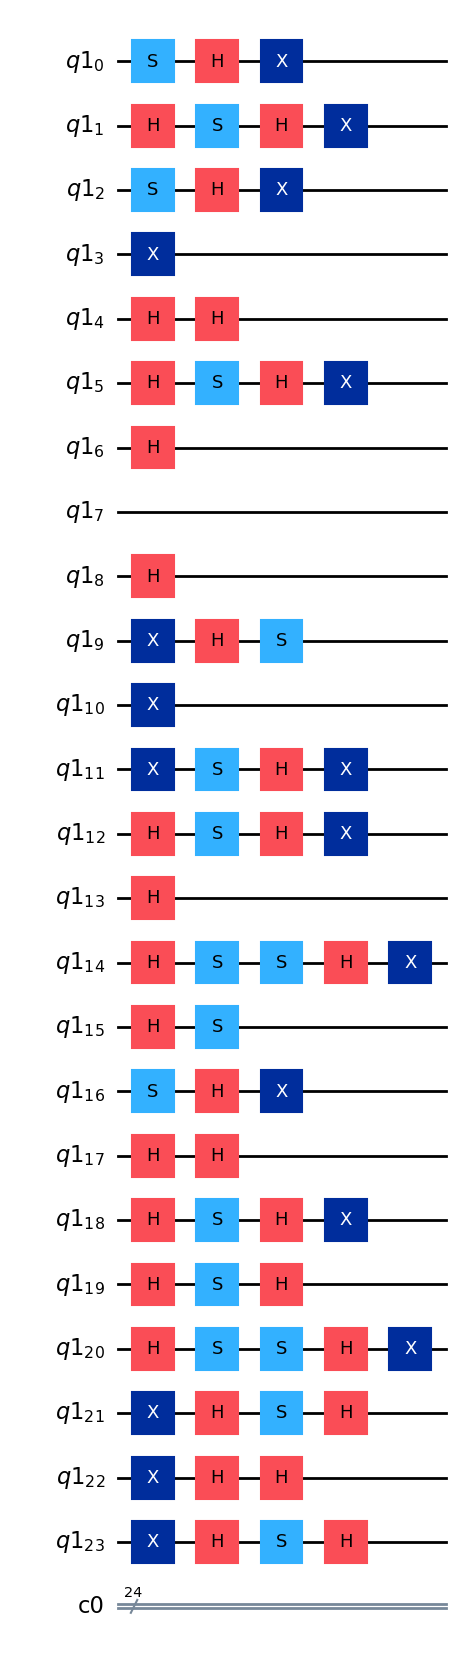

In [3]:
eve = QuantumCircuit(qreg, creg, name='Eve') #Defining Balvis circuit
SendState(asja, eve, 'Asja') #Asja sends states to Balvis

for i, k in enumerate(eve_basis): 
    if k=='X':
        eve.h(qreg[i])
    if k=="Y":
        eve.s(qreg[i])
        eve.h(qreg[i])
        eve.x(qreg[i])
            

eve.draw("mpl")

Eve send the measured state to the balvis and then Balvis measures the states according to his randomly generated basis.

['\nx q1[3]', '\nx q1[9]', '\nx q1[10]', '\nx q1[11]', '\nx q1[21]', '\nx q1[22]', '\nx q1[23]', '\nh q1[1]', '\nh q1[4]', '\nh q1[5]', '\nh q1[8]', '\nh q1[9]', '\ns q1[9]', '\nh q1[12]', '\nh q1[14]', '\ns q1[14]', '\nh q1[15]', '\ns q1[15]', '\nh q1[17]', '\nh q1[18]', '\nh q1[19]', '\ns q1[19]', '\nh q1[20]', '\ns q1[20]', '\nh q1[21]', '\ns q1[21]', '\nh q1[22]', '\nh q1[23]', '\ns q1[23]', '\ns q1[0]', '\nh q1[0]', '\nx q1[0]', '\ns q1[1]', '\nh q1[1]', '\nx q1[1]', '\ns q1[2]', '\nh q1[2]', '\nx q1[2]', '\nh q1[4]', '\ns q1[5]', '\nh q1[5]', '\nx q1[5]', '\nh q1[6]', '\ns q1[11]', '\nh q1[11]', '\nx q1[11]', '\ns q1[12]', '\nh q1[12]', '\nx q1[12]', '\nh q1[13]', '\ns q1[14]', '\nh q1[14]', '\nx q1[14]', '\ns q1[16]', '\nh q1[16]', '\nx q1[16]', '\nh q1[17]', '\ns q1[18]', '\nh q1[18]', '\nx q1[18]', '\nh q1[19]', '\ns q1[20]', '\nh q1[20]', '\nx q1[20]', '\nh q1[21]', '\nh q1[22]', '\nh q1[23]']


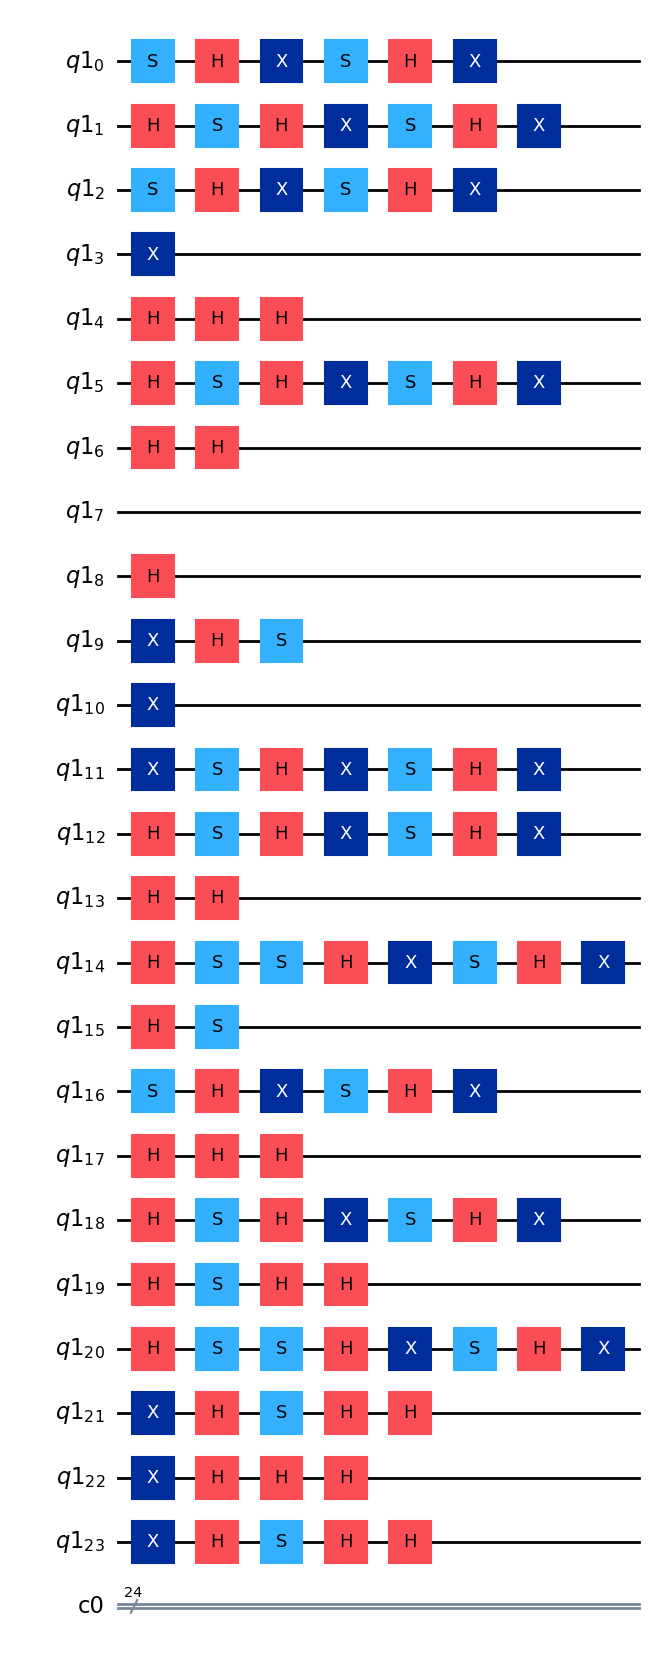

In [4]:
balvis = QuantumCircuit(qreg, creg, name='Balvis') #Defining Balvis circuit
SendState(eve, balvis, 'Asja') #Asja sends states to Balvis

for i, k in enumerate(balvis_basis): 
    if k=='X':
        balvis.h(qreg[i])
    if k=="Y":
        balvis.s(qreg[i])
        balvis.h(qreg[i])
        balvis.x(qreg[i])

            

balvis.draw("mpl")

Balvis measures the states in computational basis.

In [5]:
balvis.measure(qreg,creg)

job = assemble(balvis)
result = Aer.get_backend('qasm_simulator').run(job).result()
counts = result.get_counts(balvis)
received = print_outcomes_in_reserve(counts)

print("Asja sent:", send_str)
print("Balvis received:", received)

Asja sent: 000100000111000000000111
Balvis received: 100110001010001010001110


C:\Users\dell\AppData\Local\Temp\ipykernel_2572\4216519245.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = Aer.get_backend('qasm_simulator').run(job).result()


#With classical communiation BAlvis and Asja will compare the basis.

In [6]:

asja_key=[] #Asjas register for matching rounds
balvis_key=[] #Balvis register for matching rounds
for j in range(0,len(asja_basis)): #Going through list of bases 
    if asja_basis[j] == balvis_basis[j]: #Comparing
        asja_key.append(send[j])
        balvis_key.append(received[j]) #Keeping key bit if bases matched
    else:
        pass #Discard round if bases mismatched
balvis_key = [eval(i) for i in balvis_key]

print("Asjas key =", asja_key)
print("Balvis key =", balvis_key)
        

Asjas key = [1, 0, 0, 1, 0, 0, 0, 1]
Balvis key = [1, 1, 0, 1, 1, 0, 1, 1]


Error Correction

In [7]:
rounds = len(asja_key)//3    #To divide without remainer, use //

errors=0
for i in range(rounds):
    bit_index = randrange(len(asja_key)) 
    
    tested_bit = asja_key[bit_index]
    print ("Asja randomly selected bit index =", bit_index, ", and its value is = ", tested_bit)
    if asja_key[bit_index]!=balvis_key[bit_index]: #comparing tested rounds
        errors=errors+1 #calculating errors
    #removing tested bits from key strings
    del asja_key[bit_index] #Use del to specify the index of the element you want to delete
    del balvis_key[bit_index]
if rounds!=0:
    QBER=errors/rounds #calculating QBER
else:
    print("the key is too short for privacy amplification ")       
print("QBER value =", QBER)
print("Asjas secret key =", asja_key)
print("Balvis secret key =", balvis_key)
print("Number of errors = ", errors)

Asja randomly selected bit index = 0 , and its value is =  1
Asja randomly selected bit index = 1 , and its value is =  0
QBER value = 0.0
Asjas secret key = [0, 1, 0, 0, 0, 1]
Balvis secret key = [1, 1, 1, 0, 1, 1]
Number of errors =  0


### Information Recociliation
Again the keys may not be same, so we have to do the classical methods of information reconciliation and privacy ampification to get the same keys. 